In [36]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
result_log_set=[]


# filenames=os.listdir('../firefly-inverse-data/data/fixpro_lr/')
# for filename in filenames:
#     try:
#         result_log_set.append(torch.load('../firefly-inverse-data/data/fixpro_lr/'+filename)[0])
#         print('loaded: ',filename)
#     except:
#         print(filename)
        
# filenames=os.listdir('../firefly-inverse-data/data/fixall_lr/')
# for filename in filenames:
#     try:
#         result_log_set.append(torch.load('../firefly-inverse-data/data/fixall_lr/'+filename)[0])
#         print('loaded: ',filename)
#     except:
#         print(filename)
        
# filenames=os.listdir('../firefly-inverse-data/data/allfix/')
# for filename in filenames:
#     try:
#         result_log_set.append(torch.load('../firefly-inverse-data/data/allfix/'+filename)[0])
#         print('loaded: ',filename)
#     except:
#         print(filename)
        
# filenames=os.listdir('../firefly-inverse-data/data/fixobs_lr/')
# for filename in filenames:
#     try:
#         result_log_set.append(torch.load('../firefly-inverse-data/data/fixobs_lr/'+filename)[0])
#         print('loaded: ',filename)
#     except:
#         print(filename)

filenames=os.listdir('../firefly-inverse-data/data/lognoise/')
for filename in filenames:
    try:
        result_log_set.append(torch.load('../firefly-inverse-data/data/lognoise/'+filename)[0])
        print('loaded: ',filename)
    except:
        print(filename)

# filenames=os.listdir('../firefly-inverse-data/data/alllog/')
# for filename in filenames:
#     try:
#         result_log_set.append(torch.load('../firefly-inverse-data/data/alllog/'+filename)[0])
#         print('loaded: ',filename)
#     except:
#         print(filename)

# filenames=os.listdir('../firefly-inverse-data/data/alllog2/')
# for filename in filenames:
#     try:
#         result_log_set.append(torch.load('../firefly-inverse-data/data/alllog2/'+filename)[0])
#         print('loaded: ',filename)
#     except:
#         print(filename)

# filenames=os.listdir('../firefly-inverse-data/data/gainrangelong/')
# for filename in filenames:
#     try:
#         result_log_set.append(torch.load('../firefly-inverse-data/data/gainrangelong/'+filename))
#         print('loaded: ',filename)
#     except:
#         print('fail to load: ',filename)

# filenames=os.listdir('../firefly-inverse-data/data/')
# for filename in filenames:
#     try:
#         result_log_set.append(torch.load('../firefly-inverse-data/data/'+filename))
#         print('loaded: ',filename)
#     except:
#         print('fail to load: ',filename)

loaded:  log gainnoise0EP500.1sample2IT100_LR_parttheta_result.pkl
loaded:  log gainnoise1EP500.1sample2IT100_LR_parttheta_result.pkl
loaded:  log gainnoise2EP500.1sample2IT100_LR_parttheta_result.pkl
loaded:  log noise 10EP100.1sample2IT500_LR_parttheta_result.pkl
loaded:  log noise 11EP100.1sample2IT500_LR_parttheta_result.pkl
loaded:  log noise 1EP100.1sample2IT500_LR_parttheta_result.pkl
loaded:  log noise 2EP100.1sample2IT500_LR_parttheta_result.pkl
loaded:  log noise 3EP100.1sample2IT500_LR_parttheta_result.pkl
loaded:  log noise 4EP100.1sample2IT500_LR_parttheta_result.pkl
loaded:  log noise 5EP100.1sample2IT500_LR_parttheta_result.pkl
loaded:  log noise 6EP100.1sample2IT500_LR_parttheta_result.pkl
loaded:  log noise 7EP100.1sample2IT500_LR_parttheta_result.pkl
loaded:  log noise 8EP100.1sample2IT500_LR_parttheta_result.pkl
loaded:  log noise 9EP100.1sample2IT500_LR_parttheta_result.pkl


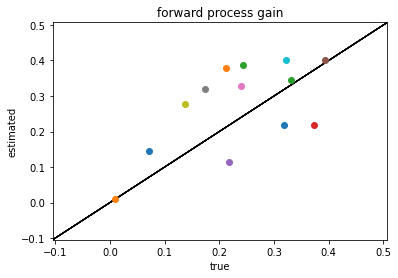

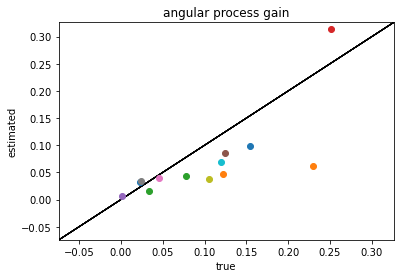

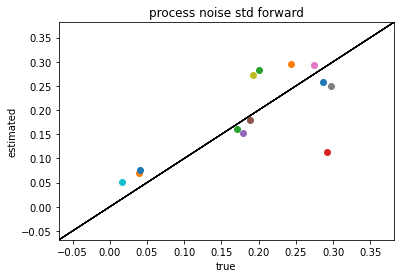

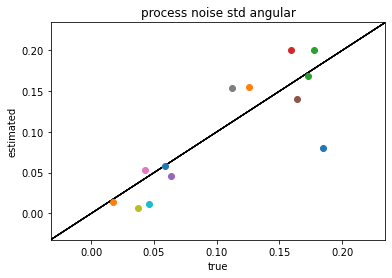

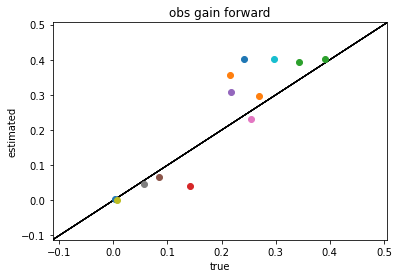

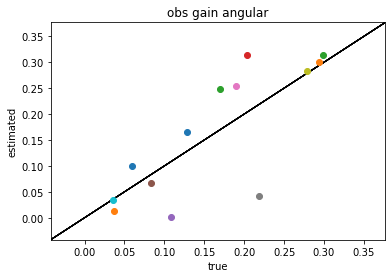

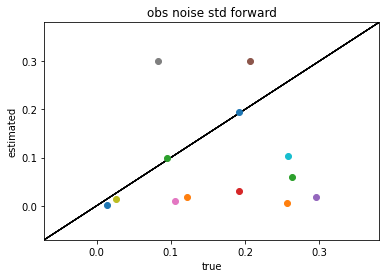

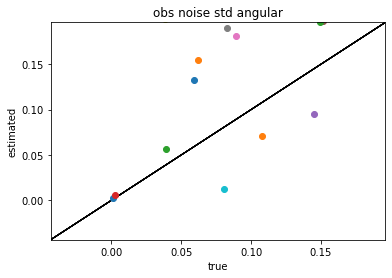

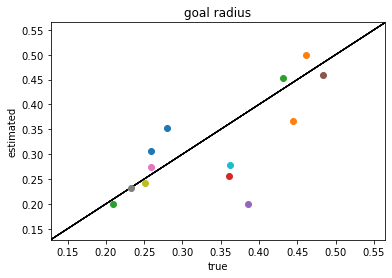

In [35]:
# for log inverse model runs

final_theta = []
true_theta = []

    
# for result in result_log_set:
#         final_theta.append(result['theta'][-1])
#         true_theta.append(result['phi'])

for result in result_log_set:
#     print('true   ',np.exp(result['true_theta']))
#     print('recover',np.exp(result['theta'].detach().numpy()))
    final_theta.append(result['theta'])
    true_theta.append(result['true_theta'])

title_range = ['forward process gain', 'angular process gain', 'process noise std forward',
                          'process noise std angular', 'obs gain forward', 'obs gain angular', 'obs noise std forward',
                          'obs noise std angular', 'goal radius']


for i in range(9):
    xylim=[10.,0.]
    for theta,phi in zip(final_theta,true_theta):
        theta=np.exp(theta.data)
        phi=np.exp(phi.data)
#         print(theta, phi)
        if phi[i].min()<xylim[0]:
            xylim[0]=phi[i].min()
        if phi[i].max()>xylim[1]:
            xylim[1]=phi[i].max()   
        plt.figure(i)
        plt.title(title_range[i])
        plt.plot([-10.3,10.2], [-10.3,10.2],  c='k',linewidth=1.0)
        plt.errorbar( phi[i],theta[i], yerr=0 , fmt='o')
        plt.ylabel('estimated')
        plt.xlabel('true')
#         plt.xlim(0, phi[i].max()+0.3)
#         plt.ylim(0, phi[i].max()+0.3)
#         plt.xlim(phi[i].min()-0.3, phi[i].max()+0.3)
#         plt.ylim(phi[i].min()-0.3, phi[i].max()+0.3)
    plt.xlim(xylim[0]-0.3*(xylim[1]-xylim[0]),xylim[1]+0.3*(xylim[1]-xylim[0]))
    plt.ylim(xylim[0]-0.3*(xylim[1]-xylim[0]),xylim[1]+0.3*(xylim[1]-xylim[0]))
# plt.plot(phi[i], phi[i],  c='b',linewidth=2.0)

KeyError: 'loss'

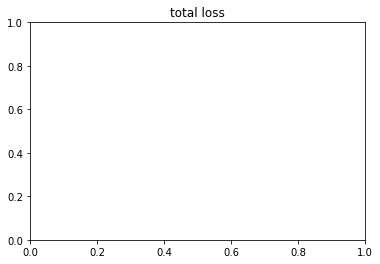

In [32]:
index=2

for index in range(len(result_log)):
    result_log= result_log_set[index]
    filename=filenames[index]
    plt.figure(1)
    plt.title('total loss')
    plt.plot(result_log['loss'])
    plt.ylim(min(result_log['oloss'])-2500, max(result_log['loss'])+2000)
    plt.figure(2)
    plt.title('action loss')
    plt.plot(result_log['aloss'])
    plt.ylim(min(result_log['oloss'])-2500, max(result_log['loss'])+2000)
    plt.figure(3)
    plt.title('obs loss')
    plt.plot(result_log['oloss'])
    plt.ylim(min(result_log['oloss'])-2500, max(result_log['loss'])+2000)

17


KeyError: 'loss_log'

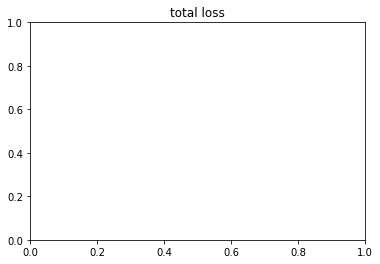

In [23]:
index=0
result_log= result_log_set[index][0]
print(len(result_log))
filename=filenames[index]
plt.figure()
plt.title('total loss')
plt.plot(result_log['loss_log'])

Text(0.5, 1.0, 'process gain velocity')

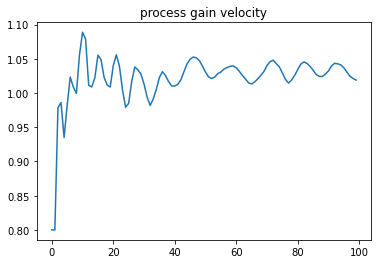

In [273]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][0])
plt.figure()
plt.plot(theta_log)
plt.title('process gain velocity')

Text(0.5, 1.0, 'proces gain angular velocity')

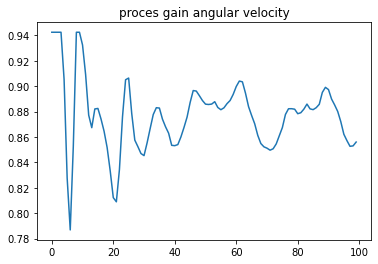

In [274]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][1])
plt.figure()
plt.plot(theta_log)
plt.title('proces gain angular velocity')

Text(0.5, 1.0, 'observation gain velocity')

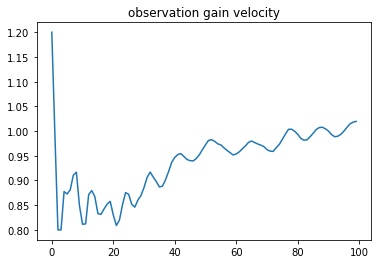

In [275]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][4])
plt.figure()
plt.plot(theta_log)
plt.title('observation gain velocity')

Text(0.5, 1.0, 'observation gain anglular velocity ')

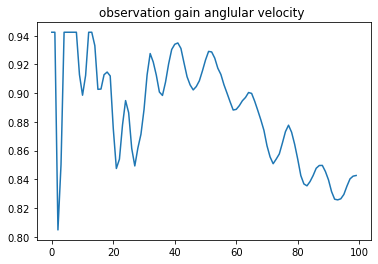

In [276]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][5])
plt.figure()
plt.plot(theta_log)
plt.title('observation gain anglular velocity ')

Text(0.5, 1.0, 'goal radius')

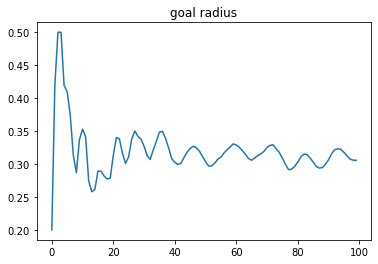

In [277]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][8])
plt.figure()
plt.plot(theta_log)
plt.title('goal radius')

Text(0.5, 1.0, 'pro noise')

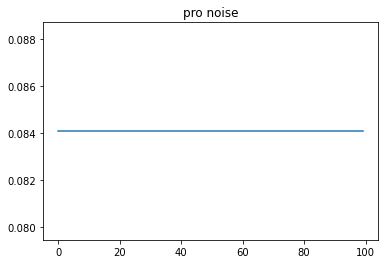

In [278]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][2])
plt.figure()
plt.plot(theta_log)
plt.title('pro noise')

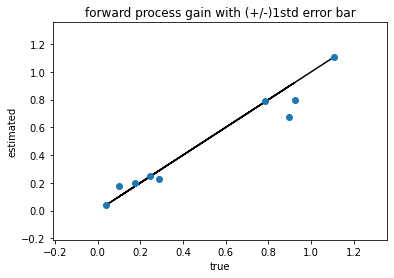

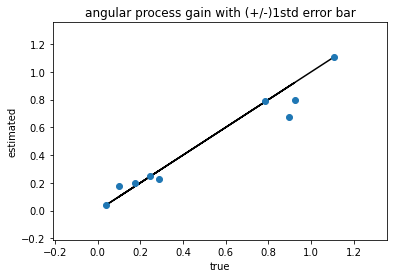

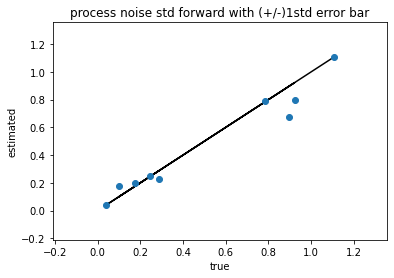

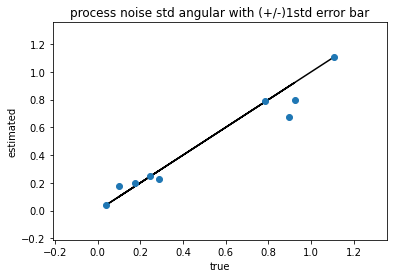

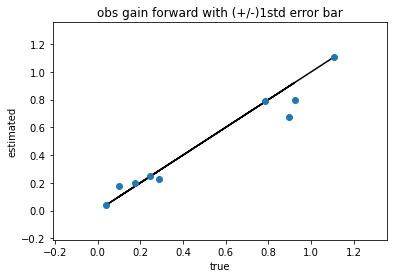

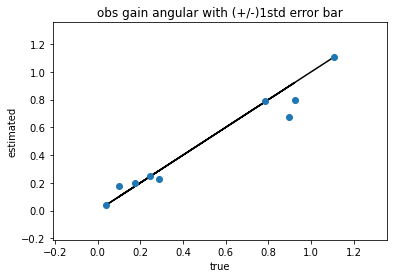

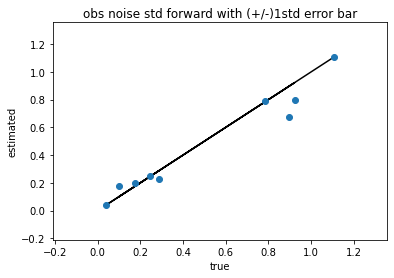

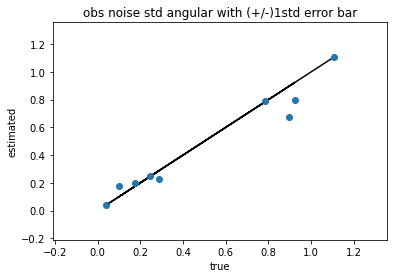

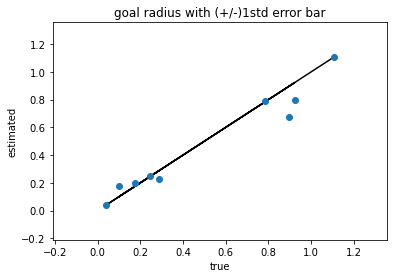

In [39]:
def mplotter(x, y, yerr, title = None, xlabel=None, ylabel=None):
    plt.figure()
    plt.errorbar(x, y, yerr , fmt='o')
    plt.plot(x, x, 'k-')
    
    if xlabel is not None:
        plt.xlabel(xlabel)
    else: plt.xlabel('true')
            
    if ylabel is not None:
        plt.ylabel(ylabel)
    else: plt.ylabel('estimated')
        
    if title is not None:
        plt.title(title)


# true_theta=result_log['true_theta']
# true_theta=result_log['phi']

final_theta = []
true_theta = []
stderr = []

# for ttt in range(len(result_log_set)):
#     final_theta.append(result_log['theta'].data)
#     true_theta.append(result_log['true_theta'].data)
#     stderr.append(result_log['stderr'].data)
    
    
    
for result in result_log_set:
    for each_run in result:
        final_theta.append(each_run['theta'].data)
        true_theta.append(each_run['true_theta'].data)
        stderr.append(each_run['stderr'].data)

title_range = ['forward process gain', 'angular process gain', 'process noise std forward',
                          'process noise std angular', 'obs gain forward', 'obs gain angular', 'obs noise std forward',
                          'obs noise std angular', 'goal radius']
for i in range(9):
    mplotter(true_theta[i],final_theta[i], yerr =stderr[i] ,title = title_range[i]+' with (+/-)1std error bar')
    plt.xlim(true_theta[i].min()-0.25, true_theta[i].max()+0.25)
    plt.ylim(true_theta[i].min()-0.25, true_theta[i].max()+0.25)

In [39]:

for each_run in result_log:
    final_theta.append(each_run['theta'].data)
    true_theta.append(each_run['true_theta'].data)
    stderr.append(each_run['stderr'].data)

title_range = ['forward process gain', 'angular process gain', 'process noise std forward',
                          'process noise std angular', 'obs gain forward', 'obs gain angular', 'obs noise std forward',
                          'obs noise std angular', 'goal radius']
for i in range(9):
    mplotter(true_theta[i],final_theta[i], yerr =stderr[i] ,title = title_range[i]+' with (+/-)1std error bar')
    plt.xlim(true_theta[i].min()-0.25, true_theta[i].max()+0.25)
    plt.ylim(true_theta[i].min()-0.25, true_theta[i].max()+0.25)

NameError: name 'final_theta' is not defined

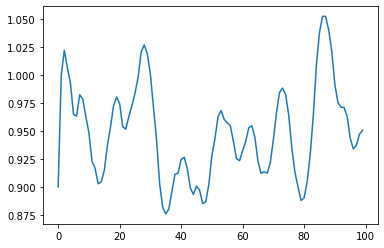

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
singlef=torch.load('../firefly-inverse-data/data/plot solve for all no oloss low lr4.pkl')
singlef['progainv']
plt.plot(singlef['progainv'])

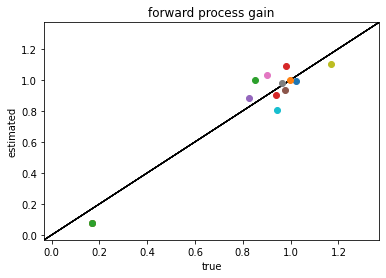

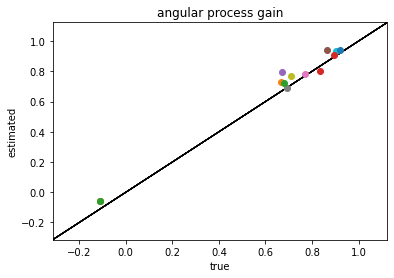

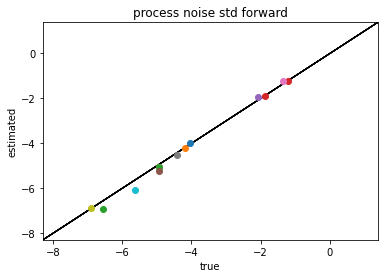

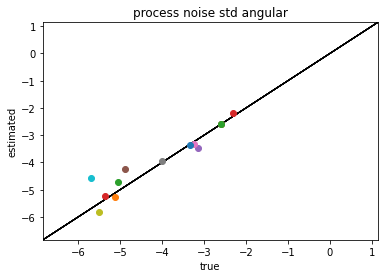

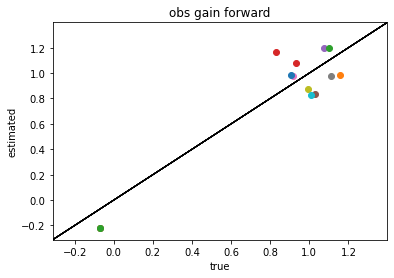

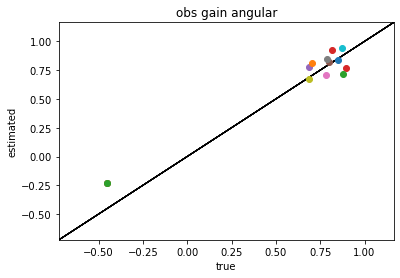

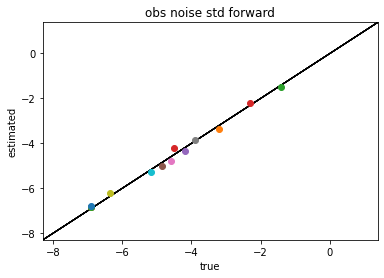

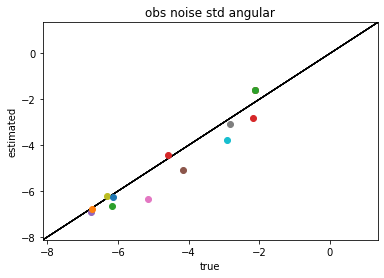

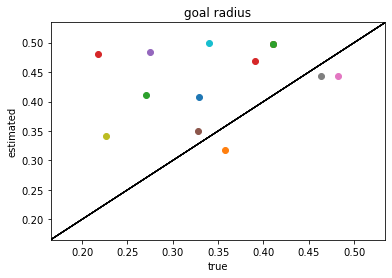

In [37]:
# for inverse model runs

final_theta = []
true_theta = []

    
# for result in result_log_set:
#         final_theta.append(result['theta'][-1])
#         true_theta.append(result['phi'])

for result in result_log_set:
    final_theta.append(result['theta'])
    true_theta.append(result['true_theta'])

title_range = ['forward process gain', 'angular process gain', 'process noise std forward',
                          'process noise std angular', 'obs gain forward', 'obs gain angular', 'obs noise std forward',
                          'obs noise std angular', 'goal radius']


for i in range(9):
    xylim=[10.,0.]
    for theta,phi in zip(final_theta,true_theta):
        if phi[i].min()<xylim[0]:
            xylim[0]=phi[i].min()
        if phi[i].max()>xylim[1]:
            xylim[1]=phi[i].max()   
        plt.figure(i)
        plt.title(title_range[i])
        plt.plot([-13.3,13.2], [-13.3,13.2],  c='k',linewidth=1.0)
        plt.errorbar( phi[i],theta[i], yerr=0 , fmt='o')
        plt.ylabel('estimated')
        plt.xlabel('true')
#         plt.xlim(0, phi[i].max()+0.3)
#         plt.ylim(0, phi[i].max()+0.3)
#         plt.xlim(phi[i].min()-0.3, phi[i].max()+0.3)
#         plt.ylim(phi[i].min()-0.3, phi[i].max()+0.3)
    plt.xlim(xylim[0]-0.2*(xylim[1]-xylim[0]),xylim[1]+0.2*(xylim[1]-xylim[0]))
    plt.ylim(xylim[0]-0.2*(xylim[1]-xylim[0]),xylim[1]+0.2*(xylim[1]-xylim[0]))
plt.plot(phi[i], phi[i],  c='b',linewidth=2.0)

In [51]:
len(result_log_set)

9

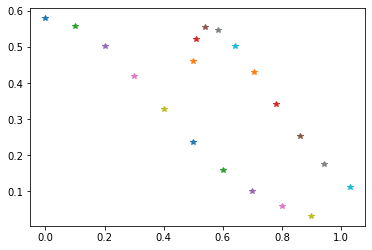

In [133]:
import torch
import numpy as np
from numpy import pi
def test(x,y):
    mu=torch.Tensor([x,y])
    P = torch.Tensor([[0.2, 0.],
                    [1., 1.]])

    rew_std=0.2

    R = torch.eye(2) * rew_std**2
    S = R+P

    alpha = -0.5 * mu @ S.inverse() @ mu.t()
    
    reward = torch.exp(alpha) /2 / np.pi /torch.sqrt(S.det())
#     print(reward)
    return  reward
    

for x in np.arange(0,1,0.1):
    for y in np.arange(0,1,0.5):
        plt.figure(1)
        plt.plot(np.sqrt(x**2+y**2),test(x,y),'*')

    

In [109]:
torch.Tensor([[1., 1.],
        [1., 1.]])

tensor([[1., 1.],
        [1., 1.]])